# **EDA Project on Household Power Consumption**

#### Problem Statement
Electricity consumption in households fluctuates throughout the day and across various 
appliances.  Gaining  a  clear  understanding  of  these  patterns  is  essential  for  optimizing  energy 
efficiency, lowering expenses, and promoting sustainable power usage. However, many 
households  lack  detailed  information  on  their  electricity  consumption,  the  appliances  that 
contribute  most  to  their  energy  use,  and  the  effects  of  voltage  fluctuations  on  overall  power 
consumption.

#### Importing Libraries Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

#### Importing Dataset

In [3]:
df = pd.read_csv('household_power_consumption.csv')

#### Getting the basic info

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [5]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0
1048574,13/12/2008,21:38:00,0.422,0.078,242.61,1.8,0,0,0.0


In [6]:
df.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
217789,16/5/2007,23:13:00,0.318,0.118,239.15,1.4,0,0,0.0
836046,19/7/2008,7:30:00,2.382,0,237.13,11,0,0,0.0
238901,31/5/2007,15:05:00,0.278,0.05,236.64,1.2,0,0,0.0
409981,27/9/2007,10:25:00,1.318,0.052,236.19,5.6,0,2,17.0
730974,7/5/2008,8:18:00,1.422,0.11,241.35,5.8,0,0,18.0


##### **Q1. Total no. of records in the dataset ?**
1048575

In [7]:
df.shape    # 1 Million Rows

(1048575, 9)

In [8]:
# Q.3   Data types of each column
# Ans.  Listed below
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [9]:
df.describe()

,Sub_metering_3
count,1.044506e+06
mean,5.933837e+00
std,8.210398e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.700000e+01
max,3.100000e+01


##### **Q4. What is the range of dates present in the dataset** 

In [10]:
df['Date'].min(), df['Date'].max()

('1/1/2007', '9/9/2008')

#### Checking Null Values

In [11]:
# Q2.   How many missing values in the data set ?
# Ans.  4069 in column submetering3
df.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

#### Checking duplicate Values

In [12]:
df.duplicated().sum()

np.int64(0)

## Removing Null Values
- From the above we saw that Sub_metering_3 has Nan values.
- The step I'm taking to see if the column is numeric or categorical.

In [13]:
df['Sub_metering_3'].unique()

array([17., 16., 18.,  9.,  0.,  5., 19., 10., 20.,  8.,  4.,  2.,  3.,
       11., 13.,  6., 15., nan, 12.,  1., 14.,  7., 23., 25., 26., 28.,
       27., 21., 22., 29., 24., 30., 31.])

In [14]:
df['Sub_metering_3'].shape

(1048575,)

**_From above it is clear that the column in question is Categorical._**

- Now, for further analysis I checked the other similar columns if they are categorical or numerical

In [15]:
df['Sub_metering_1'].unique()

array(['0', '1', '2', '6', '37', '36', '38', '25', '12', '11', '9', '4',
       '33', '5', '34', '8', '26', '27', '15', '20', '21', '23', '16',
       '10', '39', '32', '?', '19', '35', '30', '40', '7', '31', '17',
       '3', '29', '24', '14', '41', '53', '76', '75', '77', '74', '28',
       '68', '58', '62', '13', '18', '22', '64', '71', '56', '72', '45',
       '42', '59', '66', '43', '44', '48', '46', '73', '55', '60', '70',
       '63', '67', '47', '65', '51', '50', '69', '78', '57', '49', '61',
       '52', '54', '79', '80'], dtype=object)

In [16]:
df['Sub_metering_1'].shape

(1048575,)

In [17]:
df['Sub_metering_2'].unique()

array(['1', '2', '0', '16', '37', '36', '22', '12', '27', '20', '9', '4',
       '3', '5', '13', '35', '28', '26', '24', '21', '17', '33', '25',
       '23', '18', '30', '31', '7', '38', '29', '50', '71', '59', '62',
       '70', '40', '34', '8', '15', '6', '32', '19', '14', '49', '72',
       '73', '61', '39', '42', '10', '56', '11', '?', '43', '67', '63',
       '53', '65', '52', '69', '48', '74', '41', '47', '58', '68', '64',
       '75', '46', '57', '60', '66', '44', '78', '77', '76', '51', '55',
       '45', '54'], dtype=object)

In [18]:
df['Sub_metering_2'].shape

(1048575,)

**_From above it is clear that the columns in question are also Categorical._**

- From the above analysis of the other two columns, I saw unusual '?'
- So, down I tried to figure out how it is playing out in df

In [19]:
df[df['Sub_metering_1'] == '?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1043669,10/12/2008,11:53:00,?,?,?,?,?,?,NaN
1043670,10/12/2008,11:54:00,?,?,?,?,?,?,NaN
1043671,10/12/2008,11:55:00,?,?,?,?,?,?,NaN
1043672,10/12/2008,11:56:00,?,?,?,?,?,?,NaN


**_The Nan values and other '?' have a strong relation with each other_**
- I figured it out as 4069 rows of above result and 4069 Nan.
- The conclusion I got was: **_The whole 4069 rows are of no use, so drop them_** 

#### Droping the rows

In [20]:
row_indexes = df[df['Sub_metering_1'] == '?'].index

df.drop(index=row_indexes, inplace=True)

#### Checking the correctness of my cleaning

In [21]:
df.isnull().sum()           # all null values gone

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [22]:
df.shape

(1044506, 9)

In [23]:
df['Sub_metering_1'].unique()

array(['0', '1', '2', '6', '37', '36', '38', '25', '12', '11', '9', '4',
       '33', '5', '34', '8', '26', '27', '15', '20', '21', '23', '16',
       '10', '39', '32', '19', '35', '30', '40', '7', '31', '17', '3',
       '29', '24', '14', '41', '53', '76', '75', '77', '74', '28', '68',
       '58', '62', '13', '18', '22', '64', '71', '56', '72', '45', '42',
       '59', '66', '43', '44', '48', '46', '73', '55', '60', '70', '63',
       '67', '47', '65', '51', '50', '69', '78', '57', '49', '61', '52',
       '54', '79', '80'], dtype=object)

In [24]:
df['Sub_metering_2'].unique()

array(['1', '2', '0', '16', '37', '36', '22', '12', '27', '20', '9', '4',
       '3', '5', '13', '35', '28', '26', '24', '21', '17', '33', '25',
       '23', '18', '30', '31', '7', '38', '29', '50', '71', '59', '62',
       '70', '40', '34', '8', '15', '6', '32', '19', '14', '49', '72',
       '73', '61', '39', '42', '10', '56', '11', '43', '67', '63', '53',
       '65', '52', '69', '48', '74', '41', '47', '58', '68', '64', '75',
       '46', '57', '60', '66', '44', '78', '77', '76', '51', '55', '45',
       '54'], dtype=object)

In [25]:
df['Sub_metering_3'].unique()

array([17., 16., 18.,  9.,  0.,  5., 19., 10., 20.,  8.,  4.,  2.,  3.,
       11., 13.,  6., 15., 12.,  1., 14.,  7., 23., 25., 26., 28., 27.,
       21., 22., 29., 24., 30., 31.])

## Changing Data Type of Certain Column 

In [26]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [27]:
columns = df.columns

for i in range(2, len(columns)):
    df[columns[i]] = pd.to_numeric(df[columns[i]], errors='coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044506 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1044506 non-null  object 
 1   Time                   1044506 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1044506 non-null  float64
 6   Sub_metering_1         1044506 non-null  int64  
 7   Sub_metering_2         1044506 non-null  int64  
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 79.7+ MB


##### **Q5. Make a Total_Submetering column by adding the all submeterings.**

In [29]:
df['Total_sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

In [30]:
df.head()   # The column has been added

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_sub_metering
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0,18.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0,1,16.0,17.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0,2,17.0,19.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0,1,17.0,18.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0,18.0


##### **Q6. What are the summary statistics (mean, median, min, max, standard deviation) for global_active_power, global_reactive_power, voltage, and global_intensity?**

1. Global Active Power

In [31]:
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

for col in columns:
    print(f'{columns.index(col)+1}. {col}')
    print(f'Mean: {df[col].mean()}')
    print(f'Median: {df[col].median()}')
    print(f'Min: {df[col].min()}')
    print(f'Max: {df[col].max()}')
    print(f'Standard Deviation: {df[col].std()}')
    
    print('-------------------------------------------')

1. Global_active_power
Mean: 1.1082021682977403
Median: 0.55
Min: 0.076
Max: 10.67
Standard Deviation: 1.1295457867167757
-------------------------------------------
2. Global_reactive_power
Mean: 0.11827318177205298
Median: 0.098
Min: 0.0
Max: 1.39
Standard Deviation: 0.1095062030819408
-------------------------------------------
3. Voltage
Mean: 239.9598030073547
Median: 240.21
Min: 223.49
Max: 252.14
Standard Deviation: 3.2845043176644007
-------------------------------------------
4. Global_intensity
Mean: 4.718122825527091
Median: 2.4
Min: 0.2
Max: 46.4
Standard Deviation: 4.763588196960266
-------------------------------------------


##### **Q7. What is the mean and standard deviation of the Total_Submetering column?**

In [32]:
print(f'Mean: {df['Total_sub_metering'].mean()}')
print(f'Standard Deviation: {df['Total_sub_metering'].std()}')

Mean: 8.586464797712987
Standard Deviation: 13.255753450851518


##### **Q8. What is the distribution of voltage in the dataset?**

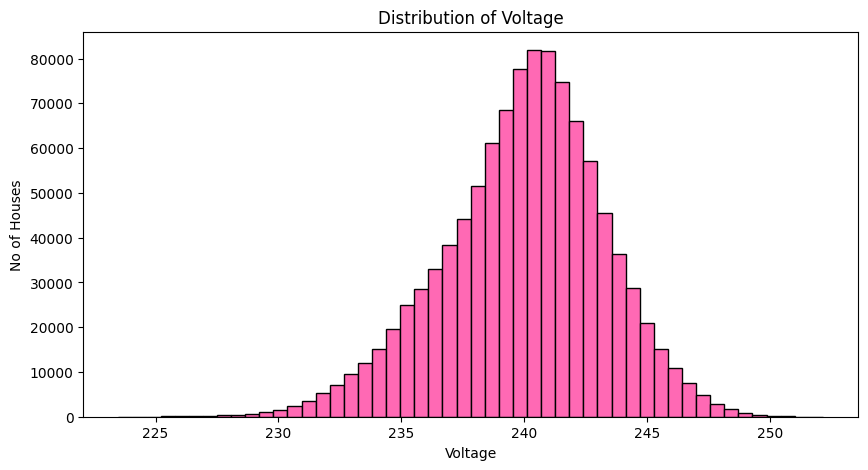

In [33]:
plt.figure(figsize=(10,5))
plt.hist(df['Voltage'], bins=50, edgecolor='black', color='hotpink')
plt.title('Distribution of Voltage')
plt.xlabel('Voltage')
plt.ylabel('No of Houses')
# plt.grid()
plt.show()

[]

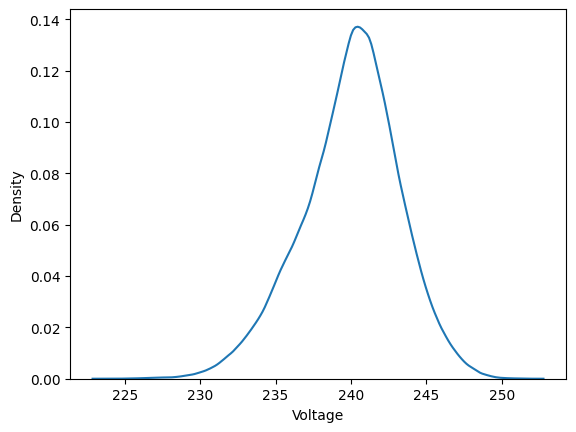

In [34]:
sns.kdeplot(df['Voltage'])
plt.plot()

##### **Q9. What is the correlation between global_active_power and global_intensity?**

In [35]:
df[['Global_active_power']].corrwith(df['Global_intensity'])
# Here I have taken nested bracket because the corrwith attribute only comes with dataframe and not series.

Global_active_power    0.99902
dtype: float64

##### **Q10. How does global_active_power vary with voltage?**

In [36]:
df['Global_active_power'].corr(df['Voltage'])

np.float64(-0.4009869720451423)

_**Ans.** As co-relation between them is negative, therefore, as value of voltage increases the value of global active power decreases_

**Q11. What are the minimum and maximum values of global_active_power, and at what 
times did they occur?**

In [37]:
df['Global_active_power'].min(), df['Global_active_power'].max()

(np.float64(0.076), np.float64(10.67))

In [38]:
df[df['Global_active_power'] == df['Global_active_power'].min()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_sub_metering
871322,12/8/2008,19:26:00,0.076,0.0,236.50,0.2,0,0,1.0,1.0
894442,28/8/2008,20:46:00,0.076,0.0,235.18,0.2,0,0,0.0,0.0
894443,28/8/2008,20:47:00,0.076,0.0,235.40,0.2,0,0,1.0,1.0
894444,28/8/2008,20:48:00,0.076,0.0,234.88,0.2,0,0,1.0,1.0
894445,28/8/2008,20:49:00,0.076,0.0,234.34,0.2,0,0,0.0,0.0
894446,28/8/2008,20:50:00,0.076,0.0,234.06,0.2,0,0,1.0,1.0
894447,28/8/2008,20:51:00,0.076,0.0,234.03,0.2,0,0,1.0,1.0
894448,28/8/2008,20:52:00,0.076,0.0,233.92,0.2,0,0,0.0,0.0
894458,28/8/2008,21:02:00,0.076,0.0,235.64,0.2,0,0,1.0,1.0


In [39]:
df[df['Global_active_power'] == df['Global_active_power'].max()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_sub_metering
112450,4/3/2007,19:34:00,10.67,0.516,230.2,46.4,37,69,16.0,122.0


##### **Q11.  How does global_active_power change over different hours of the day? (Hourly trend)**

In [40]:
# Making a column of datetime type, so I can extract hour from it.
df['DateTime'] = pd.to_datetime(df['Date']+' '+df['Time'], dayfirst=True)

In [41]:
# Extracting hour from the DateTime column and adding a hour column.
df['hour'] = df['DateTime'].dt.hour

In [42]:
# We are getting the AVERAGE power consumed by hour.
household_avg_power = df.groupby('hour')['Global_active_power'].mean()

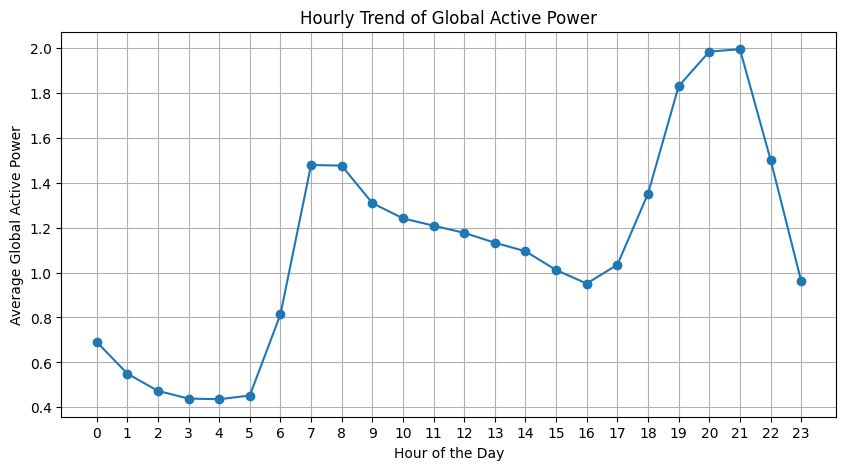

In [43]:
# Plotting the graph between average power consumption and hour
plt.figure(figsize=(10,5))
household_avg_power.plot(kind='line',marker='o')
plt.title('Hourly Trend of Global Active Power')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power')
plt.grid()
plt.xticks(range(0,24))
plt.show()

_**Why we did what we did?** If we do it like below, direct extraction, the time is a string column having values like "00:00:00", "00:01:00", "01:00:00", etc.,  a very fine-grained set of time strings, resulting in 1,440 unique values, not 24 hourly bins. That's why the below graph is a mess and not at all useful._<br><br>
_**Why we have taken the mean?**_ 
- _You have many readings for the same hour — like 60 or more values for hour 15 (3 PM), every day._
- _All those values get jumbled in the plot._
- _You don’t get a smooth hourly trend, just a chaotic mess of points_
- _By taking the mean, we have only 24 values, one per hour. This eleminates noise, giving clear and actionable sight._

Total diffrent values of Time: (1440,)


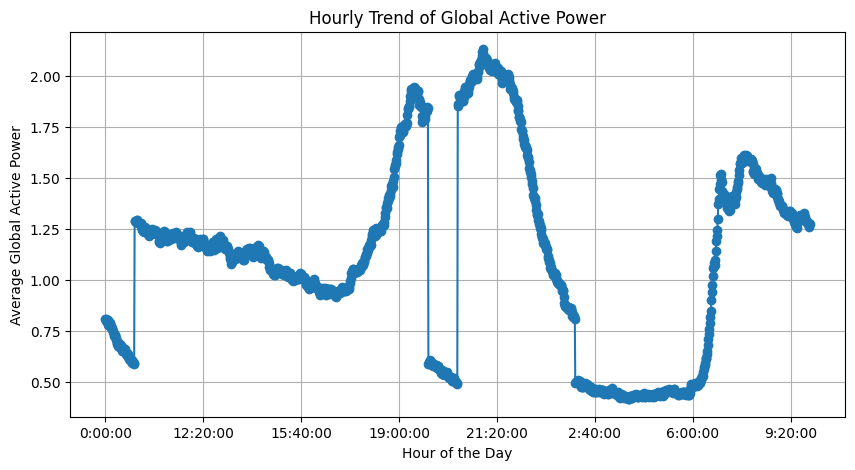

In [44]:
print(f'Total diffrent values of Time: {df['Time'].unique().shape}')

household_avg_power1 = df.groupby('Time')['Global_active_power'].mean()

plt.figure(figsize=(10,5))
household_avg_power1.plot(kind='line',marker='o')
plt.title('Hourly Trend of Global Active Power')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power')
plt.grid()
plt.show()

##### **Q4. What is the range of dates present in the dataset** 

In [45]:
print("Start Date:", df['DateTime'].min())
print("End Date:", df['DateTime'].max())

Start Date: 2006-12-16 17:24:00
End Date: 2008-12-13 21:38:00


##### **Q12. Are there any noticeable trends in power consumption over different days of the week?**

In [46]:
df['Days'] = df['DateTime'].dt.day_name()

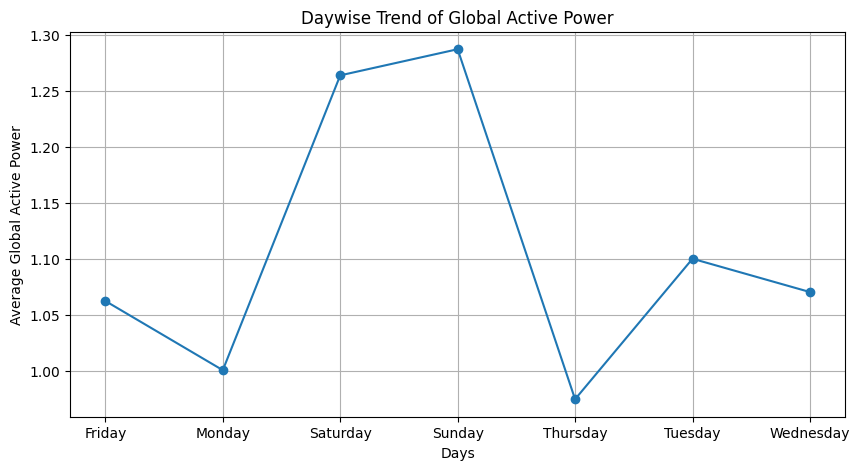

In [47]:
avg_power_consumption_daywise = df.groupby('Days')['Global_active_power'].mean()

plt.figure(figsize=(10,5))
avg_power_consumption_daywise.plot(kind='line', marker='o')
plt.title('Daywise Trend of Global Active Power')
plt.xlabel('Days')
plt.ylabel('Average Global Active Power')
plt.grid()
plt.show()

_**Is above graph correct? NO,** because the days are in Alphabetical order. We need them in natural order._

In [48]:
# Getting them in Natural order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Days'] = pd.Categorical(df['Days'], categories=days_order, ordered=True)

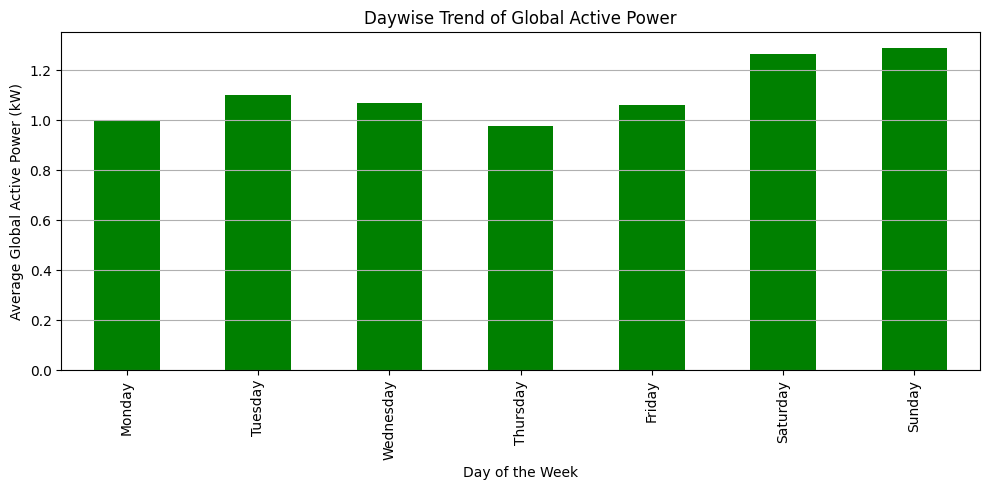

In [49]:
avg_power_consumption_daywise = df.groupby('Days')['Global_active_power'].mean()

plt.figure(figsize=(10,5))
avg_power_consumption_daywise.plot(kind='bar', color='green')
plt.title('Daywise Trend of Global Active Power')
plt.xlabel('Day of the Week')
plt.ylabel('Average Global Active Power (kW)')
plt.grid(axis='y')
plt.xticks()
plt.tight_layout()
plt.show()

In [50]:
df.groupby('Days')['Global_active_power'].mean()

Days
Monday       1.000860
Tuesday      1.100221
Wednesday    1.070536
Thursday     0.974959
Friday       1.062554
Saturday     1.263752
Sunday       1.287062
Name: Global_active_power, dtype: float64

##### **Q13. How does Total_Submetering change over different hours of the day?**

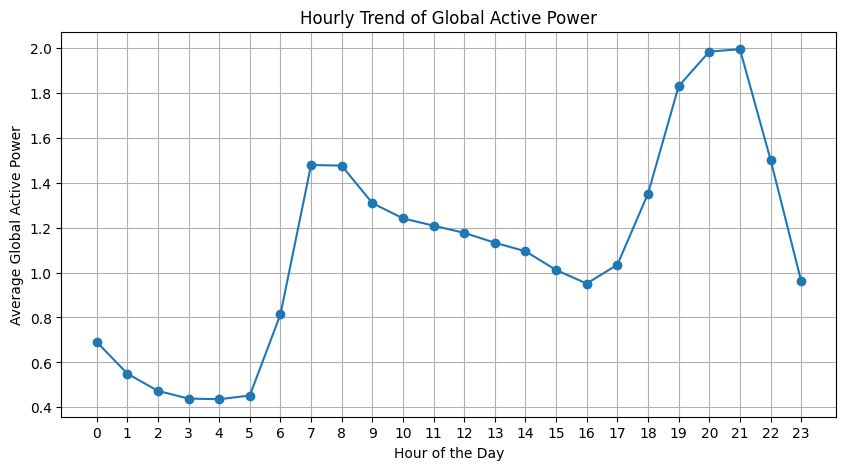

In [51]:
avg_total_submetering_hourly = df.groupby('hour')['Total_sub_metering'].mean()

plt.figure(figsize=(10,5))
household_avg_power.plot(kind='line',marker='o')
plt.title('Hourly Trend of Global Active Power')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power')
plt.grid()
plt.xticks(range(0,24))
plt.show()

##### **Q14. How does voltage fluctuate throughout a single day?**

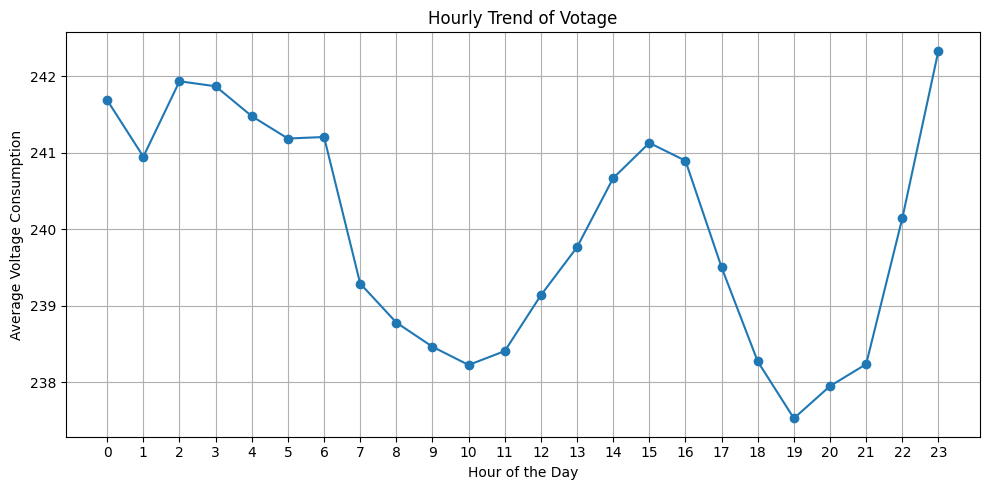

In [52]:
avg_voltage_hourwise = df.groupby('hour')['Voltage'].mean()

plt.figure(figsize=(10,5))
avg_voltage_hourwise.plot(kind='line', marker='o')
plt.title('Hourly Trend of Votage')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Voltage Consumption')
plt.grid()
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

##### **Q15. What is the average global_active_power usage for each month?**

In [53]:
df['Month'] = df['DateTime'].dt.month_name()

In [54]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(values=df['Month'], categories=months_order, ordered=True)

In [55]:
avg_global_active_power_monthly = df.groupby('Month')['Global_active_power'].mean()

In [56]:
avg_global_active_power_monthly

Month
January      1.502977
February     1.289308
March        1.281982
April        1.008642
May          1.005071
June         0.910496
July         0.731166
August       0.520283
September    0.978499
October      1.120332
November     1.340766
December     1.636841
Name: Global_active_power, dtype: float64

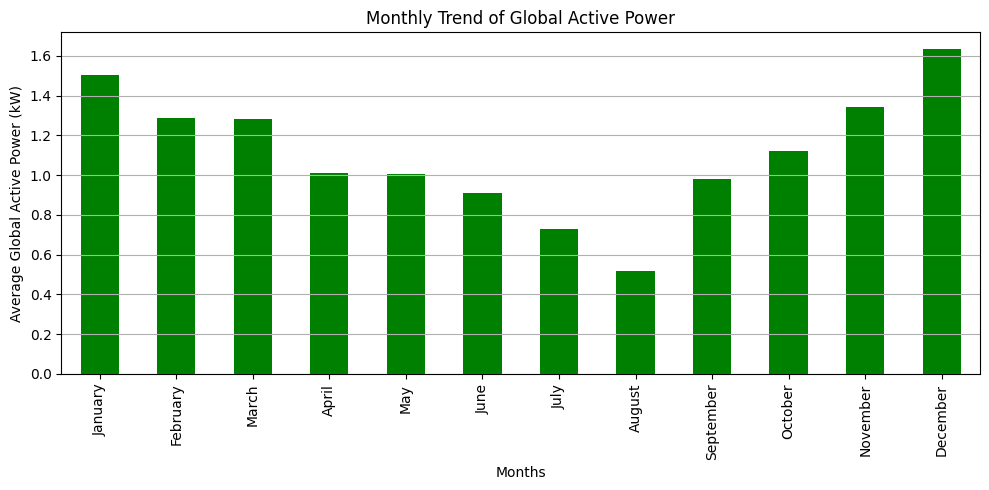

In [57]:
plt.figure(figsize=(10,5))
avg_global_active_power_monthly.plot(kind='bar', color='green')
plt.title('Monthly Trend of Global Active Power')
plt.xlabel('Months')
plt.ylabel('Average Global Active Power (kW)')
plt.grid(axis='y')
plt.xticks()
plt.tight_layout()
plt.show()

##### **Q16. Which sub-metering category (sub_metering_1, sub_metering_2, or sub_metering_3) consumes the most power on average?**

In [58]:
print(f'1m = {df['Sub_metering_1'].mean()}')
print(f'2m = {df['Sub_metering_2'].mean()}')
print(f'3m = {df['Sub_metering_3'].mean()}')

1m = 1.177451350207658
2m = 1.4751767821343296
3m = 5.933836665370999


_Sub Metering 3 consumes the most average power and is significantly higher than the other two_

##### **Q17.  How does Total_Submetering compare with global_active_power? Is there a strong correlation?**

In [59]:
df['Total_sub_metering'].corr(df['Global_active_power'])

np.float64(0.831514530526884)

- _Yes, there is a strong correlation (0.83) between Total_sub_metering and Global_active_power._

- _But since the correlation is not perfect (i.e., not close to 1), it suggests that some part of the total power is not captured by the three sub-meterings._

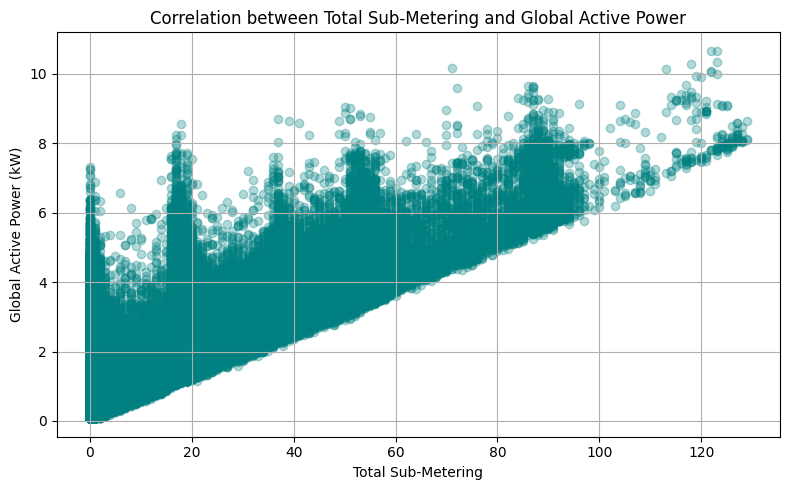

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(df['Total_sub_metering'], df['Global_active_power'], alpha=0.3, color='teal')
plt.title('Correlation between Total Sub-Metering and Global Active Power')
plt.xlabel('Total Sub-Metering')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
# Take a random sample of 5000 rows
# sampled_df = df.sample(n=5000, random_state=1)
# plt.figure(figsize=(8, 5))
# sns.regplot(x='Total_sub_metering', y='Global_active_power', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
# plt.title('Correlation between Total Sub-Metering and Global Active Power (Sampled)')
# plt.xlabel('Total Sub-Metering')
# plt.ylabel('Global Active Power (kW)')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


##### **Q18. How much energy is consumed outside of the three sub-metering categories (global_active_power - Total_Submetering)?**

In [62]:
# Global_active_power is in kilowatts, and the sub-meterings are in watt-minutes, so we multiply Global_active_power by 1000/60 to convert it to watt-minutes.
df['Unmetered_power'] = df['Global_active_power']*1000/60 - (
    df['Total_sub_metering']
)

In [63]:
total_unmetered_energy = df['Unmetered_power'].sum()
print(f"Total energy consumed outside sub-metering: {(total_unmetered_energy/(1000*60)):.2f} kWh")

Total energy consumed outside sub-metering: 172.06 kWh


##### **Q19. Are there any specific time periods where Total_Submetering is significantly higher or lower than usual?**

In [64]:
avg_total_submetering_hourly = df.groupby('hour')['Total_sub_metering'].mean()


In [65]:
# Assuming avg_total_submetering_hourly is already defined
mean_val = avg_total_submetering_hourly.mean()
std_val = avg_total_submetering_hourly.std()

print("High Usage Hours:")
print(avg_total_submetering_hourly[avg_total_submetering_hourly > mean_val + std_val])

print("\nLow Usage Hours:")
print(avg_total_submetering_hourly[avg_total_submetering_hourly < mean_val - std_val])

High Usage Hours:
hour
8     14.408128
9     14.244103
10    13.421454
20    13.081278
Name: Total_sub_metering, dtype: float64

Low Usage Hours:
hour
0    3.884653
1    2.777839
2    2.064070
3    1.705241
4    1.789264
5    2.080736
Name: Total_sub_metering, dtype: float64


_This shows the hours where sub-metering is significantly above or below average, using one standard deviation._

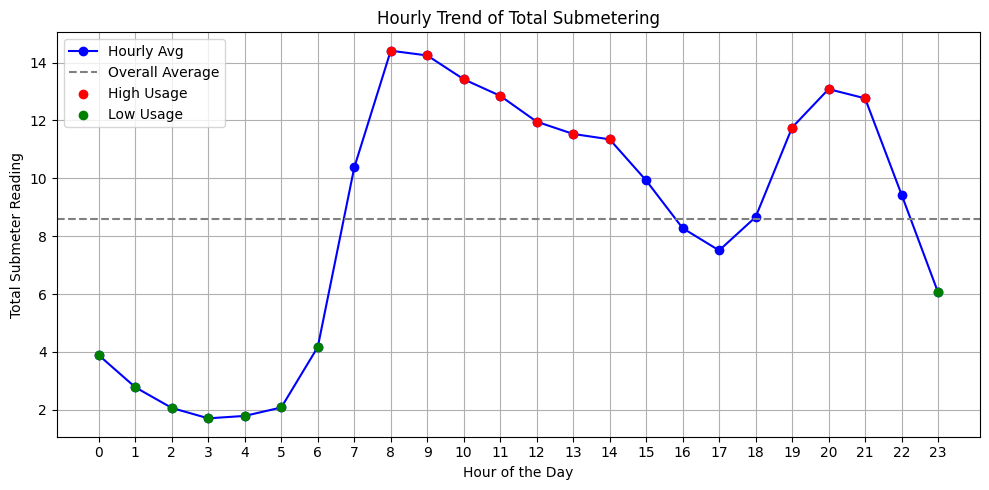

In [66]:
#                                                       GRAPHICAL REPRESNTATION

# Looser thresholds: mean ± 0.5 * std
high_threshold = mean_val + 0.5 * std_val
low_threshold = mean_val - 0.5 * std_val

# Get the hours that exceed or fall below threshold
high_hours = avg_total_submetering_hourly[avg_total_submetering_hourly > high_threshold]
low_hours = avg_total_submetering_hourly[avg_total_submetering_hourly < low_threshold]

plt.figure(figsize=(10, 5))
avg_total_submetering_hourly.plot(kind='line', marker='o', color='blue', label='Hourly Avg')

plt.axhline(mean_val, color='gray', linestyle='--', label='Overall Average')

# Plot significant highs and lows
plt.scatter(high_hours.index, high_hours.values, color='red', label='High Usage', zorder=5)
plt.scatter(low_hours.index, low_hours.values, color='green', label='Low Usage', zorder=5)

plt.title('Hourly Trend of Total Submetering')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Submeter Reading')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()


##### **Q20. Which hour of the day has the highest Total_Submetering on average?**

In [67]:
peak_hour = df.groupby('hour')['Total_sub_metering'].mean().idxmax()
print(f"The hour with the highest Total_Submetering on average is: {peak_hour}:00")

The hour with the highest Total_Submetering on average is: 8:00


### Adding Additional Columns
For better visualization in streamlit app 

In [79]:
# Adding date column
df['Date'] = df['DateTime'].dt.date

In [77]:
df.drop(columns='date', inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044506 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1044506 non-null  object        
 1   Time                   1044506 non-null  object        
 2   Global_active_power    1044506 non-null  float64       
 3   Global_reactive_power  1044506 non-null  float64       
 4   Voltage                1044506 non-null  float64       
 5   Global_intensity       1044506 non-null  float64       
 6   Sub_metering_1         1044506 non-null  int64         
 7   Sub_metering_2         1044506 non-null  int64         
 8   Sub_metering_3         1044506 non-null  float64       
 9   Total_sub_metering     1044506 non-null  float64       
 10  DateTime               1044506 non-null  datetime64[ns]
 11  hour                   1044506 non-null  int32         
 12  Days                   1044506 no

In [73]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_sub_metering,DateTime,hour,Days,Month,Unmetered_power
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0,18.0,2006-12-16 17:24:00,17,Saturday,December,52.266667
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0,1,16.0,17.0,2006-12-16 17:25:00,17,Saturday,December,72.333333
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0,2,17.0,19.0,2006-12-16 17:26:00,17,Saturday,December,70.566667
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0,1,17.0,18.0,2006-12-16 17:27:00,17,Saturday,December,71.800000
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0,18.0,2006-12-16 17:28:00,17,Saturday,December,43.100000


### Copying Cleaned Data to CSV

In [80]:
df.to_csv('cleaned_dataset.csv', index=False)